In [ ]:
import numpy as np
import pandas as pd

#Etherium


In [ ]:
df_e = pd.read_csv("/content/drive/MyDrive/datasets/coin_Ethereum.csv")

In [ ]:
df_e = df_e.iloc[:,3:]

In [ ]:
df_e.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [ ]:
percent_miss_value = df_e.isnull().sum() / len(df_e) * 100
percent_miss_value

Date         0.0
High         0.0
Low          0.0
Open         0.0
Close        0.0
Volume       0.0
Marketcap    0.0
dtype: float64

In [ ]:
pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

In [ ]:
extracted_features = extract_features(df_e, column_id="Date", column_value="Close")

Feature Extraction: 100%|██████████| 2160/2160 [01:13<00:00, 29.22it/s]


In [ ]:
selected_columns = ['Close__median', 'Close__sum_values']
df = extracted_features[selected_columns]
df

,Close__median,Close__sum_values
2015-08-08 23:59:59,0.753325,0.753325
2015-08-09 23:59:59,0.701897,0.701897
2015-08-10 23:59:59,0.708448,0.708448
2015-08-11 23:59:59,1.067860,1.067860
2015-08-12 23:59:59,1.217440,1.217440
...,...,...
2021-07-02 23:59:59,2150.040364,2150.040364
2021-07-03 23:59:59,2226.114282,2226.114282
2021-07-04 23:59:59,2321.724112,2321.724112
2021-07-05 23:59:59,2198.582464,2198.582464


In [ ]:
# Assuming you have imported necessary libraries and loaded your DataFrame df

train = df.iloc[0:int(len(df)*0.8), :]
test = df.iloc[int(len(df)*0.8):, :]

# For training data
X_train = []
Y_train = []
# 3 days back:
for i in range(0, len(train)-3):
    x = train.iloc[i:(i+3), [0, 1]]  # селектирање на 'Close__median' и 'Close__sum_values' columns
    y = train.iloc[i+3, 0]  # 'Close__median' target column
    X_train.append(x.values)
    Y_train.append(y)

# For test data
X_test = []
Y_test = []
# 3 days back:
for i in range(0, len(test)-3):
    x = test.iloc[i:(i+3), [0, 1]]  # селектирање на 'Close__median' и 'Close__sum_values' columns
    y = test.iloc[i+3, 0]  # 'Close__median' target column
    X_test.append(x.values)
    Y_test.append(y)

# Конверзија од lists во arrays за компатибилност со machine learning библиотеките
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
X_train.shape

(1725, 3, 2)

In [ ]:
# Reshaping the data for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Изградба на LSTM моделот
model = Sequential()

# Градење на слоево
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))  # Output layer

# Компајлирање на моделот
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.2, shuffle=False, verbose=2)

Epoch 1/50
22/22 - 4s - loss: 86472.3438 - val_loss: 15358.0186 - 4s/epoch - 193ms/step
Epoch 2/50
22/22 - 1s - loss: 2201.3059 - val_loss: 602.5326 - 502ms/epoch - 23ms/step
Epoch 3/50
22/22 - 0s - loss: 970.3808 - val_loss: 162.0724 - 482ms/epoch - 22ms/step
Epoch 4/50
22/22 - 1s - loss: 922.0022 - val_loss: 304.6716 - 566ms/epoch - 26ms/step
Epoch 5/50
22/22 - 1s - loss: 1042.9138 - val_loss: 214.0279 - 548ms/epoch - 25ms/step
Epoch 6/50
22/22 - 1s - loss: 834.5090 - val_loss: 315.5829 - 514ms/epoch - 23ms/step
Epoch 7/50
22/22 - 0s - loss: 1180.4836 - val_loss: 508.2931 - 494ms/epoch - 22ms/step
Epoch 8/50
22/22 - 1s - loss: 830.0801 - val_loss: 512.6948 - 568ms/epoch - 26ms/step
Epoch 9/50
22/22 - 0s - loss: 1665.2211 - val_loss: 1682.7280 - 458ms/epoch - 21ms/step
Epoch 10/50
22/22 - 0s - loss: 2130.5203 - val_loss: 3465.6572 - 272ms/epoch - 12ms/step
Epoch 11/50
22/22 - 0s - loss: 9462.4561 - val_loss: 9052.8857 - 307ms/epoch - 14ms/step
Epoch 12/50
22/22 - 0s - loss: 30554.6348

In [ ]:
y_pred = model.predict(X_test)

14/14 [==============================] - 1s 4ms/step


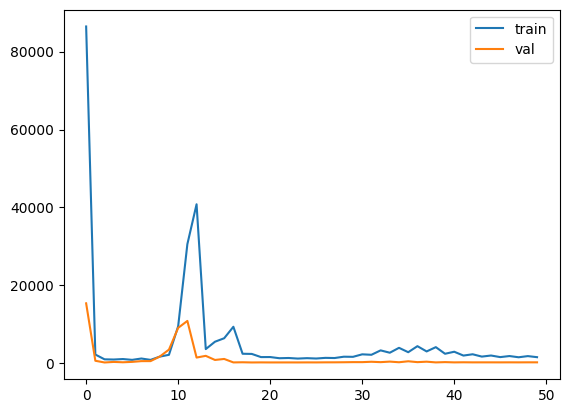

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(Y_test,y_pred)

0.9782959805933227

#Bitcoin

In [ ]:
df_b = pd.read_csv("/content/drive/MyDrive/datasets/coin_Bitcoin.csv")

In [ ]:
df_b = df_b.iloc[:,3:]

In [ ]:
df_b.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [ ]:
extracted_features = extract_features(df_b, column_id="Date", column_value="Close")

Feature Extraction: 100%|██████████| 2991/2991 [01:43<00:00, 28.76it/s]


In [ ]:
extracted_features.head()

,Close__variance_larger_than_standard_deviation,Close__has_duplicate_max,Close__has_duplicate_min,Close__has_duplicate,Close__sum_values,Close__abs_energy,Close__mean_abs_change,Close__mean_change,Close__mean_second_derivative_central,Close__median,...,Close__fourier_entropy__bins_5,Close__fourier_entropy__bins_10,Close__fourier_entropy__bins_100,Close__permutation_entropy__dimension_3__tau_1,Close__permutation_entropy__dimension_4__tau_1,Close__permutation_entropy__dimension_5__tau_1,Close__permutation_entropy__dimension_6__tau_1,Close__permutation_entropy__dimension_7__tau_1,Close__query_similarity_count__query_None__threshold_0.0,Close__mean_n_absolute_max__number_of_maxima_7
2013-04-29 23:59:59,0.0,0.0,0.0,0.0,144.539993,20891.809659,NaN,NaN,NaN,144.539993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30 23:59:59,0.0,0.0,0.0,0.0,139.000000,19321.000000,NaN,NaN,NaN,139.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01 23:59:59,0.0,0.0,0.0,0.0,116.989998,13686.659600,NaN,NaN,NaN,116.989998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02 23:59:59,0.0,0.0,0.0,0.0,105.209999,11069.143907,NaN,NaN,NaN,105.209999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03 23:59:59,0.0,0.0,0.0,0.0,97.750000,9555.062500,NaN,NaN,NaN,97.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
selected_columns = ['Close__median', 'Close__sum_values']
df = extracted_features[selected_columns]
df

,Close__median,Close__sum_values
2013-04-29 23:59:59,144.539993,144.539993
2013-04-30 23:59:59,139.000000,139.000000
2013-05-01 23:59:59,116.989998,116.989998
2013-05-02 23:59:59,105.209999,105.209999
2013-05-03 23:59:59,97.750000,97.750000
...,...,...
2021-07-02 23:59:59,33897.048590,33897.048590
2021-07-03 23:59:59,34668.548402,34668.548402
2021-07-04 23:59:59,35287.779766,35287.779766
2021-07-05 23:59:59,33746.002456,33746.002456


In [ ]:
train = df.iloc[0:int(len(df)*0.8), :]
test = df.iloc[int(len(df)*0.8):, :]

# training data
X_train = []
Y_train = []
# 3 days back:
for i in range(0, len(train)-3):
    x = train.iloc[i:(i+3), [0, 1]]  # селектирање на 'Close__median' и 'Close__sum_values' columns
    y = train.iloc[i+3, 0]  #  'Close__median' target column
    X_train.append(x.values)
    Y_train.append(y)

# test data
X_test = []
Y_test = []
# 3 days back:
for i in range(0, len(test)-3):
    x = test.iloc[i:(i+3), [0, 1]]  # селектирање на 'Close__median' и 'Close__sum_values' columns
    y = test.iloc[i+3, 0]  # 'Close__median' target column
    X_test.append(x.values)
    Y_test.append(y)

# Конверзија од lists во arrays за компатибилност со machine learning библиотеките
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
X_train.shape

(2389, 3, 2)

In [ ]:
# Reshaping the data for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Изградба на LSTM моделот
model = Sequential()

# Градење на слоевите
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))  # Output layer

# Компајлирање на моделот
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, Y_train, epochs=40, batch_size=64, validation_split=0.2, shuffle=False, verbose=2)

Epoch 1/40
30/30 - 4s - loss: 3476668.0000 - val_loss: 7311407.0000 - 4s/epoch - 142ms/step
Epoch 2/40
30/30 - 0s - loss: 116618.4844 - val_loss: 483622.1562 - 453ms/epoch - 15ms/step
Epoch 3/40
30/30 - 0s - loss: 118818.4766 - val_loss: 276860.4688 - 411ms/epoch - 14ms/step
Epoch 4/40
30/30 - 0s - loss: 155279.2656 - val_loss: 221601.1406 - 428ms/epoch - 14ms/step
Epoch 5/40
30/30 - 0s - loss: 128796.4453 - val_loss: 149627.5312 - 421ms/epoch - 14ms/step
Epoch 6/40
30/30 - 0s - loss: 140346.0938 - val_loss: 163148.6250 - 436ms/epoch - 15ms/step
Epoch 7/40
30/30 - 0s - loss: 128468.0859 - val_loss: 156100.4375 - 452ms/epoch - 15ms/step
Epoch 8/40
30/30 - 0s - loss: 132047.0781 - val_loss: 179078.8281 - 408ms/epoch - 14ms/step
Epoch 9/40
30/30 - 0s - loss: 127252.5312 - val_loss: 162432.7500 - 422ms/epoch - 14ms/step
Epoch 10/40
30/30 - 0s - loss: 122009.1562 - val_loss: 177217.9219 - 445ms/epoch - 15ms/step
Epoch 11/40
30/30 - 0s - loss: 133740.0469 - val_loss: 152716.4219 - 473ms/epoc

In [ ]:
y_pred = model.predict(X_test)

19/19 [==============================] - 0s 3ms/step


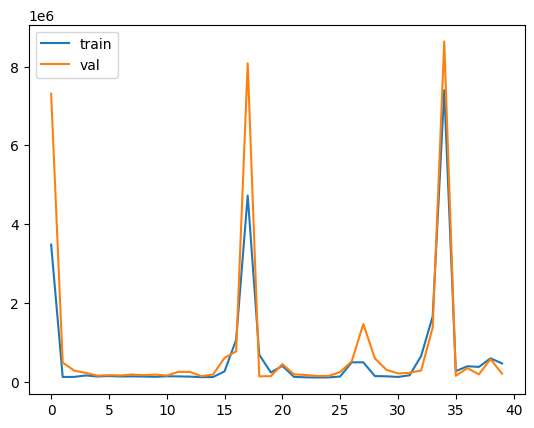

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])

In [ ]:
r2_score(Y_test,y_pred)

0.9892437724329214

#Litecoin

In [ ]:
df_l = pd.read_csv("/content/drive/MyDrive/datasets/coin_Litecoin.csv")

In [ ]:
df_l = df_l.iloc[:,3:]

In [ ]:
df_l.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,4.57360,4.22564,4.36676,4.38390,0.0,7.538896e+07
1,2013-04-30 23:59:59,4.57238,4.16896,4.40352,4.29649,0.0,7.402092e+07
2,2013-05-01 23:59:59,4.35686,3.52029,4.28954,3.80101,0.0,6.560460e+07
3,2013-05-02 23:59:59,4.03930,3.00717,3.78002,3.37198,0.0,5.828798e+07
4,2013-05-03 23:59:59,3.45361,2.39594,3.39044,3.04491,0.0,5.269485e+07


In [ ]:
df_l.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [ ]:
extracted_features = extract_features(df_l, column_id="Date", column_value="Close")

Feature Extraction: 100%|██████████| 2991/2991 [01:44<00:00, 28.75it/s]


In [ ]:
extracted_features.head()

,Close__variance_larger_than_standard_deviation,Close__has_duplicate_max,Close__has_duplicate_min,Close__has_duplicate,Close__sum_values,Close__abs_energy,Close__mean_abs_change,Close__mean_change,Close__mean_second_derivative_central,Close__median,...,Close__fourier_entropy__bins_5,Close__fourier_entropy__bins_10,Close__fourier_entropy__bins_100,Close__permutation_entropy__dimension_3__tau_1,Close__permutation_entropy__dimension_4__tau_1,Close__permutation_entropy__dimension_5__tau_1,Close__permutation_entropy__dimension_6__tau_1,Close__permutation_entropy__dimension_7__tau_1,Close__query_similarity_count__query_None__threshold_0.0,Close__mean_n_absolute_max__number_of_maxima_7
2013-04-29 23:59:59,0.0,0.0,0.0,0.0,4.38390,19.218581,NaN,NaN,NaN,4.38390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30 23:59:59,0.0,0.0,0.0,0.0,4.29649,18.459828,NaN,NaN,NaN,4.29649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01 23:59:59,0.0,0.0,0.0,0.0,3.80101,14.447676,NaN,NaN,NaN,3.80101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02 23:59:59,0.0,0.0,0.0,0.0,3.37198,11.370249,NaN,NaN,NaN,3.37198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03 23:59:59,0.0,0.0,0.0,0.0,3.04491,9.271477,NaN,NaN,NaN,3.04491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
selected_columns = ['Close__median', 'Close__sum_values']
df = extracted_features[selected_columns]
df

,Close__median,Close__sum_values
2013-04-29 23:59:59,4.383900,4.383900
2013-04-30 23:59:59,4.296490,4.296490
2013-05-01 23:59:59,3.801010,3.801010
2013-05-02 23:59:59,3.371980,3.371980
2013-05-03 23:59:59,3.044910,3.044910
...,...,...
2021-07-02 23:59:59,136.943696,136.943696
2021-07-03 23:59:59,140.279688,140.279688
2021-07-04 23:59:59,144.905849,144.905849
2021-07-05 23:59:59,138.073246,138.073246


In [ ]:
train = df.iloc[0:int(len(df)*0.8), :]
test = df.iloc[int(len(df)*0.8):, :]

# training data
X_train = []
Y_train = []
# 3 days back:
for i in range(0, len(train)-3):
    x = train.iloc[i:(i+3), [0, 1]]  # селектирање на 'Close__median' и 'Close__sum_values' columns
    y = train.iloc[i+3, 0]  # 'Close__median' target column
    X_train.append(x.values)
    Y_train.append(y)

# For test data
X_test = []
Y_test = []
# 3 days back:
for i in range(0, len(test)-3):
    x = test.iloc[i:(i+3), [0, 1]]  # селектирање на 'Close__median' и 'Close__sum_values' columns
    y = test.iloc[i+3, 0]  # 'Close__median' target column
    X_test.append(x.values)
    Y_test.append(y)

# Конверзија од lists во arrays за компатибилност со machine learning библиотеките
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
X_train.shape

(2389, 3, 2)

In [ ]:
# Reshaping the data for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Изградба на LSTM моделот
model = Sequential()

# Градење на слоеви
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))  # Output layer

# Компајлирање на моделот
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, Y_train, epochs=40, batch_size=64, validation_split=0.2, shuffle=False, verbose=2)

Epoch 1/40
30/30 - 4s - loss: 1052.4683 - val_loss: 56.3939 - 4s/epoch - 126ms/step
Epoch 2/40
30/30 - 0s - loss: 5511.2480 - val_loss: 758.3784 - 447ms/epoch - 15ms/step
Epoch 3/40
30/30 - 0s - loss: 986.4703 - val_loss: 1068.7997 - 428ms/epoch - 14ms/step
Epoch 4/40
30/30 - 0s - loss: 113.9536 - val_loss: 68.6102 - 405ms/epoch - 14ms/step
Epoch 5/40
30/30 - 0s - loss: 232.0265 - val_loss: 30.5038 - 383ms/epoch - 13ms/step
Epoch 6/40
30/30 - 0s - loss: 264.1469 - val_loss: 240.3280 - 388ms/epoch - 13ms/step
Epoch 7/40
30/30 - 0s - loss: 61.3184 - val_loss: 27.3813 - 396ms/epoch - 13ms/step
Epoch 8/40
30/30 - 0s - loss: 59.5363 - val_loss: 27.1772 - 421ms/epoch - 14ms/step
Epoch 9/40
30/30 - 0s - loss: 58.7108 - val_loss: 26.8286 - 367ms/epoch - 12ms/step
Epoch 10/40
30/30 - 0s - loss: 58.1795 - val_loss: 25.5947 - 441ms/epoch - 15ms/step
Epoch 11/40
30/30 - 0s - loss: 57.6664 - val_loss: 24.9521 - 443ms/epoch - 15ms/step
Epoch 12/40
30/30 - 0s - loss: 57.1521 - val_loss: 23.9535 - 441

In [ ]:
y_pred = model.predict(X_test)

19/19 [==============================] - 0s 3ms/step


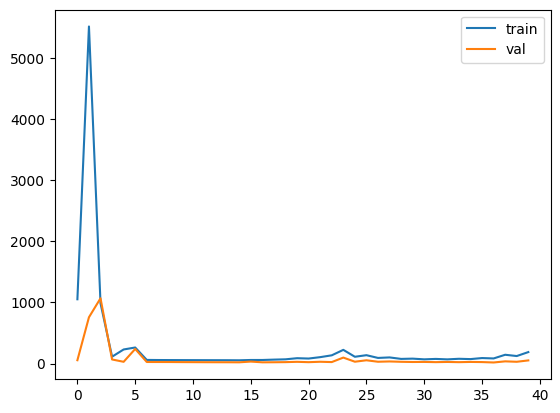

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])

In [ ]:
r2_score(Y_test,y_pred)

0.9553704589633619

#Cardano

In [ ]:
df_c = pd.read_csv("/content/drive/MyDrive/datasets/coin_Cardano.csv")

In [ ]:
df_c = df_c.iloc[:,3:]

In [ ]:
df_c.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
1,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
3,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
4,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


In [ ]:
df_c.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [ ]:
extracted_features = extract_features(df_c, column_id="Date", column_value="Close")

Feature Extraction: 100%|██████████| 1374/1374 [00:48<00:00, 28.62it/s]


In [ ]:
extracted_features.head()

,Close__variance_larger_than_standard_deviation,Close__has_duplicate_max,Close__has_duplicate_min,Close__has_duplicate,Close__sum_values,Close__abs_energy,Close__mean_abs_change,Close__mean_change,Close__mean_second_derivative_central,Close__median,...,Close__fourier_entropy__bins_5,Close__fourier_entropy__bins_10,Close__fourier_entropy__bins_100,Close__permutation_entropy__dimension_3__tau_1,Close__permutation_entropy__dimension_4__tau_1,Close__permutation_entropy__dimension_5__tau_1,Close__permutation_entropy__dimension_6__tau_1,Close__permutation_entropy__dimension_7__tau_1,Close__query_similarity_count__query_None__threshold_0.0,Close__mean_n_absolute_max__number_of_maxima_7
2017-10-02 23:59:59,0.0,0.0,0.0,0.0,0.025932,0.000672,NaN,NaN,NaN,0.025932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-03 23:59:59,0.0,0.0,0.0,0.0,0.020816,0.000433,NaN,NaN,NaN,0.020816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-04 23:59:59,0.0,0.0,0.0,0.0,0.021931,0.000481,NaN,NaN,NaN,0.021931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-05 23:59:59,0.0,0.0,0.0,0.0,0.021489,0.000462,NaN,NaN,NaN,0.021489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-06 23:59:59,0.0,0.0,0.0,0.0,0.018539,0.000344,NaN,NaN,NaN,0.018539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
selected_columns = ['Close__median', 'Close__sum_values']
df = extracted_features[selected_columns]
df

,Close__median,Close__sum_values
2017-10-02 23:59:59,0.025932,0.025932
2017-10-03 23:59:59,0.020816,0.020816
2017-10-04 23:59:59,0.021931,0.021931
2017-10-05 23:59:59,0.021489,0.021489
2017-10-06 23:59:59,0.018539,0.018539
...,...,...
2021-07-02 23:59:59,1.394397,1.394397
2021-07-03 23:59:59,1.406836,1.406836
2021-07-04 23:59:59,1.458184,1.458184
2021-07-05 23:59:59,1.404898,1.404898


In [ ]:
train = df.iloc[0:int(len(df)*0.8), :]
test = df.iloc[int(len(df)*0.8):, :]

# training data
X_train = []
Y_train = []
# 3 days back:
for i in range(0, len(train)-3):
    x = train.iloc[i:(i+3), [0, 1]]  # селектирање на 'Close__median' и 'Close__sum_values' columns
    y = train.iloc[i+3, 0]  # 'Close__median' target column
    X_train.append(x.values)
    Y_train.append(y)

# For test data
X_test = []
Y_test = []
# 3 days back:
for i in range(0, len(test)-3):
    x = test.iloc[i:(i+3), [0, 1]]  # селектирање на 'Close__median' и 'Close__sum_values' columns
    y = test.iloc[i+3, 0]  # 'Close__median' target column
    X_test.append(x.values)
    Y_test.append(y)

# Конверзија од lists во arrays за компатибилност со machine learning библиотеките
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
X_train.shape

(1096, 3, 2)

In [ ]:
# Reshaping the data for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Изградба на LSTM моделот
model = Sequential()

model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))  # Output layer

# Компајлирање на моделот
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, Y_train, epochs=40, batch_size=64, validation_split=0.2, shuffle=False, verbose=2)

Epoch 1/40
14/14 - 5s - loss: 0.0383 - val_loss: 0.0029 - 5s/epoch - 327ms/step
Epoch 2/40
14/14 - 0s - loss: 0.0287 - val_loss: 0.0012 - 449ms/epoch - 32ms/step
Epoch 3/40
14/14 - 0s - loss: 0.0228 - val_loss: 0.0021 - 423ms/epoch - 30ms/step
Epoch 4/40
14/14 - 0s - loss: 0.0189 - val_loss: 0.0033 - 399ms/epoch - 28ms/step
Epoch 5/40
14/14 - 0s - loss: 0.0158 - val_loss: 0.0030 - 428ms/epoch - 31ms/step
Epoch 6/40
14/14 - 0s - loss: 0.0127 - val_loss: 0.0020 - 344ms/epoch - 25ms/step
Epoch 7/40
14/14 - 0s - loss: 0.0095 - val_loss: 0.0014 - 224ms/epoch - 16ms/step
Epoch 8/40
14/14 - 0s - loss: 0.0057 - val_loss: 8.2415e-04 - 203ms/epoch - 14ms/step
Epoch 9/40
14/14 - 0s - loss: 0.0025 - val_loss: 2.4056e-04 - 235ms/epoch - 17ms/step
Epoch 10/40
14/14 - 0s - loss: 0.0018 - val_loss: 1.4237e-04 - 211ms/epoch - 15ms/step
Epoch 11/40
14/14 - 0s - loss: 0.0018 - val_loss: 1.2149e-04 - 219ms/epoch - 16ms/step
Epoch 12/40
14/14 - 0s - loss: 0.0016 - val_loss: 1.1193e-04 - 243ms/epoch - 17ms/

In [ ]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


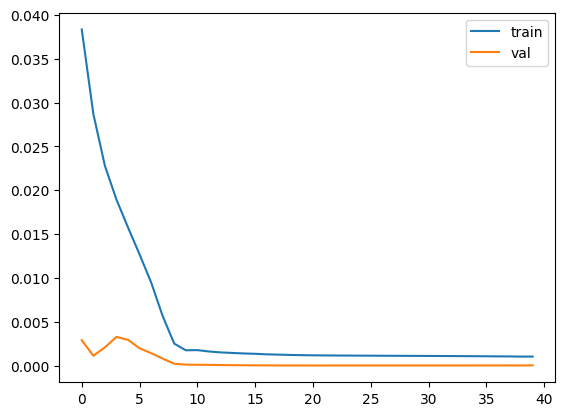

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])

In [ ]:
r2_score(Y_test,y_pred)

0.9390897012584953

#Monero

In [ ]:
df_m = pd.read_csv("/content/drive/MyDrive/datasets/coin_Monero.csv")

In [ ]:
df_m = df_m.iloc[:,3:]

In [ ]:
df_m.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2014-05-22 23:59:59,2.18888,1.35909,1.58940,2.09558,132918.0,1.855608e+06
1,2014-05-23 23:59:59,3.43437,2.05104,2.05104,2.96302,266852.0,2.692180e+06
2,2014-05-24 23:59:59,4.01424,2.61778,2.92039,3.70245,248028.0,3.456658e+06
3,2014-05-25 23:59:59,4.04303,2.80330,4.04303,3.13856,283545.0,2.993339e+06
4,2014-05-26 23:59:59,3.76235,2.31202,3.21897,3.02186,220148.0,2.946133e+06


In [ ]:
df_m.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [ ]:
extracted_features = extract_features(df_m, column_id="Date", column_value="Close")

Feature Extraction: 100%|██████████| 2602/2602 [01:33<00:00, 27.89it/s]


In [ ]:
extracted_features.head()

,Close__variance_larger_than_standard_deviation,Close__has_duplicate_max,Close__has_duplicate_min,Close__has_duplicate,Close__sum_values,Close__abs_energy,Close__mean_abs_change,Close__mean_change,Close__mean_second_derivative_central,Close__median,...,Close__fourier_entropy__bins_5,Close__fourier_entropy__bins_10,Close__fourier_entropy__bins_100,Close__permutation_entropy__dimension_3__tau_1,Close__permutation_entropy__dimension_4__tau_1,Close__permutation_entropy__dimension_5__tau_1,Close__permutation_entropy__dimension_6__tau_1,Close__permutation_entropy__dimension_7__tau_1,Close__query_similarity_count__query_None__threshold_0.0,Close__mean_n_absolute_max__number_of_maxima_7
2014-05-22 23:59:59,0.0,0.0,0.0,0.0,2.09558,4.391456,NaN,NaN,NaN,2.09558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-23 23:59:59,0.0,0.0,0.0,0.0,2.96302,8.779488,NaN,NaN,NaN,2.96302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-24 23:59:59,0.0,0.0,0.0,0.0,3.70245,13.708136,NaN,NaN,NaN,3.70245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-25 23:59:59,0.0,0.0,0.0,0.0,3.13856,9.850559,NaN,NaN,NaN,3.13856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-26 23:59:59,0.0,0.0,0.0,0.0,3.02186,9.131637,NaN,NaN,NaN,3.02186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
selected_columns = ['Close__median', 'Close__sum_values']
df = extracted_features[selected_columns]
df

,Close__median,Close__sum_values
2014-05-22 23:59:59,2.095580,2.095580
2014-05-23 23:59:59,2.963020,2.963020
2014-05-24 23:59:59,3.702450,3.702450
2014-05-25 23:59:59,3.138560,3.138560
2014-05-26 23:59:59,3.021860,3.021860
...,...,...
2021-07-02 23:59:59,211.345143,211.345143
2021-07-03 23:59:59,214.752778,214.752778
2021-07-04 23:59:59,219.841418,219.841418
2021-07-05 23:59:59,214.464993,214.464993


In [ ]:
train = df.iloc[0:int(len(df)*0.8), :]
test = df.iloc[int(len(df)*0.8):, :]

# training data
X_train = []
Y_train = []
# 3 days back:
for i in range(0, len(train)-3):
    x = train.iloc[i:(i+3), [0, 1]]  # селектирање на 'Close__median' и 'Close__sum_values' columns
    y = train.iloc[i+3, 0]  # 'Close__median' target column
    X_train.append(x.values)
    Y_train.append(y)

# For test data
X_test = []
Y_test = []
# 3 days back:
for i in range(0, len(test)-3):
    x = test.iloc[i:(i+3), [0, 1]]  # селектирање на 'Close__median' и 'Close__sum_values' columns
    y = test.iloc[i+3, 0]  # 'Close__median' target column
    X_test.append(x.values)
    Y_test.append(y)

# Конверзија од lists во arrays за компатибилност со machine learning библиотеките
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
X_train.shape

(2078, 3, 2)

In [ ]:
# Reshaping the data for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Изградба на LSTM моделот
model = Sequential()

# Градење на слоевите
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))  # Output layer

# Компајлирање на моделот
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, Y_train, epochs=40, batch_size=64, validation_split=0.2, shuffle=False, verbose=2)

Epoch 1/40
26/26 - 6s - loss: 5098.8237 - val_loss: 469.0526 - 6s/epoch - 244ms/step
Epoch 2/40
26/26 - 0s - loss: 3547.9958 - val_loss: 202.3149 - 455ms/epoch - 17ms/step
Epoch 3/40
26/26 - 0s - loss: 2822.3135 - val_loss: 870.6490 - 362ms/epoch - 14ms/step
Epoch 4/40
26/26 - 0s - loss: 342.4501 - val_loss: 44.9702 - 368ms/epoch - 14ms/step
Epoch 5/40
26/26 - 0s - loss: 259.6616 - val_loss: 21.4814 - 358ms/epoch - 14ms/step
Epoch 6/40
26/26 - 0s - loss: 208.2703 - val_loss: 62.0320 - 340ms/epoch - 13ms/step
Epoch 7/40
26/26 - 0s - loss: 225.9323 - val_loss: 48.7412 - 370ms/epoch - 14ms/step
Epoch 8/40
26/26 - 0s - loss: 351.7484 - val_loss: 45.7826 - 396ms/epoch - 15ms/step
Epoch 9/40
26/26 - 0s - loss: 191.4926 - val_loss: 19.0337 - 391ms/epoch - 15ms/step
Epoch 10/40
26/26 - 0s - loss: 177.5735 - val_loss: 23.9590 - 411ms/epoch - 16ms/step
Epoch 11/40
26/26 - 0s - loss: 143.6728 - val_loss: 18.1876 - 420ms/epoch - 16ms/step
Epoch 12/40
26/26 - 0s - loss: 141.6555 - val_loss: 19.9686

In [ ]:
y_pred = model.predict(X_test)

17/17 [==============================] - 1s 5ms/step


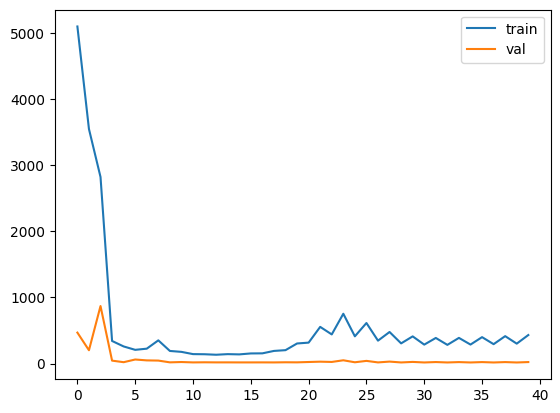

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])

In [ ]:
r2_score(Y_test,y_pred)

0.9693071770446516